In [19]:
# General imports
import json 
import glob
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np # linear algebra
import seaborn as sns
import pytz

# Sklearn imports
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans #The k-means algorithm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [20]:
df = pd.read_csv('data/data.csv')
df = df.drop(["Tijdstempel"] , axis=1)

In [21]:
df.columns = ['how_survey_across', 'digital_skill_level', 'digital_privacy_aware', 'terms_conditions', 'digital_privacy_aware_score', 'data_protection', 'how_protection', 'data_deletion', 'worst_case_scenario', 'age', 'gender', 'born', 'education', 'pet', 'device', 'student', 'source_income', 'income', 'living_situation', 'screen_time', 'social_media_activity', 'main_social_media']

In [22]:
df.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,A friend sent it to me,Always online,Yes,No,8,Yes,VPN;Deleting cookies,Not sure,Sold,21,...,VWO,Cat,iPhone,Yes,Student loan,700,Living with parents,6,3.0,Tiktok
1,NaN,Always online,No,No,4,No,I dont,Not sure,Ads being sold,20,...,HAVO,Dog,Samsung smartphone,Yes,Student loan,500,Living with parents,8,4.0,Tiktok
2,A friend sent it to me,Digital native,Yes,Sometimes,7,Yes,VPN;Different accounts;Deleting cookies,Not sure,Getting in the wrong hands,22,...,HBO-Bachelor,Cat,iPhone,No,Job,2400,Renting a room,7,2.0,Reddit


In [42]:
df.describe(include='all')

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
count,40,41,41,41,41.000000,41,37,41,34,41.000000,...,41,41,41,41,41,41.000000,41,41.000000,40.000000,41
unique,3,5,2,3,NaN,3,21,3,33,NaN,...,9,2,5,2,6,NaN,4,NaN,NaN,7
top,A friend sent it to me,Always online,Yes,No,NaN,Yes,VPN;Different accounts;Deleting cookies;Limite...,Not sure,Leaks,NaN,...,HBO-Bachelor,Cat,iPhone,No,Job,NaN,Living with parents,NaN,NaN,Tiktok
freq,18,16,24,28,NaN,17,4,20,2,NaN,...,15,22,17,30,28,NaN,17,NaN,NaN,12
mean,NaN,NaN,NaN,NaN,5.756098,NaN,NaN,NaN,NaN,22.780488,...,NaN,NaN,NaN,NaN,NaN,1930.487805,NaN,6.414634,2.050000,NaN
std,NaN,NaN,NaN,NaN,2.527652,NaN,NaN,NaN,NaN,2.464875,...,NaN,NaN,NaN,NaN,NaN,1018.876713,NaN,2.607447,0.985797,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,18.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2.000000,1.000000,NaN
25%,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,21.000000,...,NaN,NaN,NaN,NaN,NaN,900.000000,NaN,4.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,23.000000,...,NaN,NaN,NaN,NaN,NaN,2200.000000,NaN,7.000000,2.000000,NaN
75%,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,24.000000,...,NaN,NaN,NaN,NaN,NaN,2600.000000,NaN,8.000000,3.000000,NaN


In [36]:
# create a dataframe with numerical values
df_numerical = df.copy()
# fill NaN values with 0
df_numerical = df_numerical.fillna(0)
# convert categorical values to numerical values
df_numerical['how_survey_across'] = df_numerical['how_survey_across'].astype('category').cat.codes
df_numerical['digital_skill_level'] = df_numerical['digital_skill_level'].astype('category').cat.codes
df_numerical['digital_privacy_aware'] = df_numerical['digital_privacy_aware'].astype('category').cat.codes
df_numerical['terms_conditions'] = df_numerical['terms_conditions'].astype('category').cat.codes
df_numerical['data_protection'] = df_numerical['data_protection'].astype('category').cat.codes
df_numerical['how_protection'] = df_numerical['how_protection'].astype('category').cat.codes
df_numerical['data_deletion'] = df_numerical['data_deletion'].astype('category').cat.codes
df_numerical['education'] = df_numerical['education'].astype('category').cat.codes
df_numerical['pet'] = df_numerical['pet'].astype('category').cat.codes
df_numerical['student'] = df_numerical['student'].astype('category').cat.codes
df_numerical['living_situation'] = df_numerical['living_situation'].astype('category').cat.codes
df_numerical['worst_case_scenario'] = df_numerical['worst_case_scenario'].astype('category').cat.codes
df_numerical.head(3)

,how_survey_across,digital_skill_level,digital_privacy_aware,terms_conditions,digital_privacy_aware_score,data_protection,how_protection,data_deletion,worst_case_scenario,age,...,education,pet,device,student,source_income,income,living_situation,screen_time,social_media_activity,main_social_media
0,1,0,1,0,8,2,14,1,21,21,...,6,0,iPhone,1,Student loan,700,0,6,3.0,Tiktok
1,0,0,0,0,4,0,8,1,1,20,...,0,1,Samsung smartphone,1,Student loan,500,0,8,4.0,Tiktok
2,1,2,1,1,7,2,16,1,5,22,...,1,0,iPhone,0,Job,2400,2,7,2.0,Reddit


In [ ]:
df_numerical.describe().T

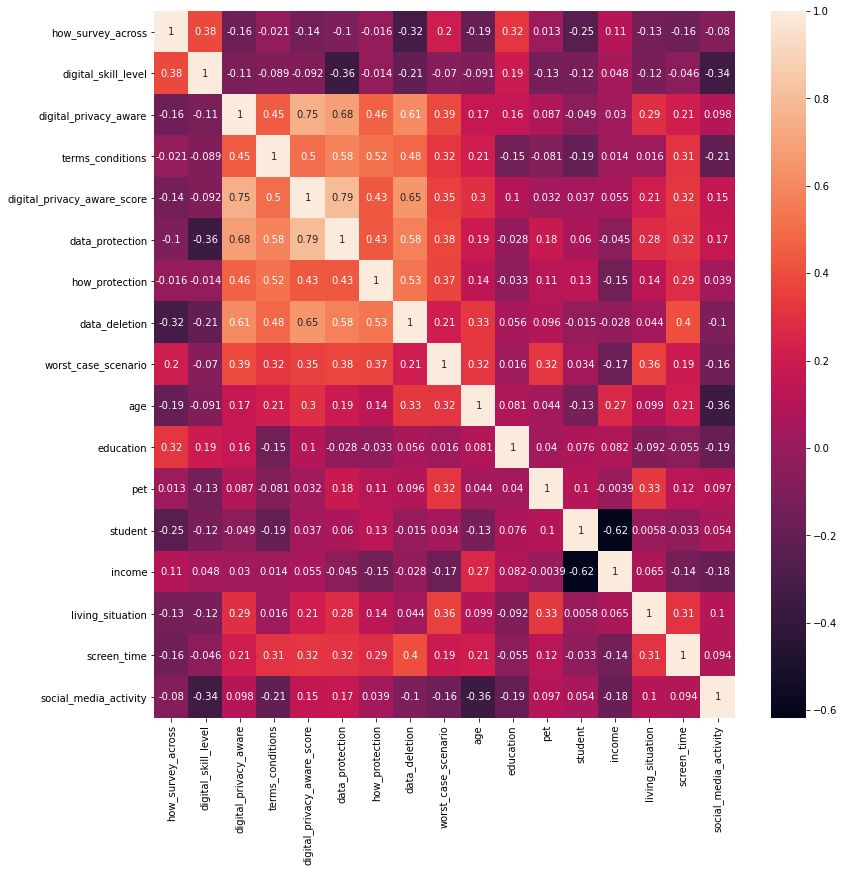

In [37]:
correlation_mat = df_numerical.corr()
correlation_mat
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(correlation_mat, annot = True, xticklabels=correlation_mat.columns, yticklabels=correlation_mat.columns, ax=ax)
plt.show()